In [1]:
from examples.wmt_2020.common.util.reader import read_annotated_file, read_test_file
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

TRAIN_FILE = "data/ne-en/train.neen.df.short.tsv"
DEV_FILE = "data/ne-en/dev.neen.df.short.tsv"
TEST_FILE = "data/ne-en/test20.neen.df.short.tsv"

train = read_annotated_file(TRAIN_FILE)
dev = read_annotated_file(DEV_FILE)
test = read_test_file(TEST_FILE)

train[:10]

,index,original,translation,z_mean
0,0,रैका भन्ने शब्दबाट रैकावर/रैका तप्पा नामाकरण भ...,Raikawar / Raika Tappa is named from the word ...,0.853093
1,1,यो कुरा हनुमानको पादपीठमा कुँदिएको अभिलेखबाट थ...,It is known from a recipe that is cooked in th...,-0.431285
2,2,प्रस्तुत काव्यमा छन्दशास्त्रीय नियमअनुसार ‘शिख...,According to the rosary rules in the present c...,-1.465843
3,3,सिन्धुलीमाढी शहरमा झन्डै ४० हजार मानीस बसोबास ...,Maanis live nearly 40 thousand in the city of ...,-0.516619
4,4,"भगवान् शिवको हातमा रहेको त्रिशुल, बज्र आयुध नै...","The Tree, which is in the hands of the goddess...",-1.058211
5,5,त्यसपछि त्यसलाइ देवताको रुपमा गिरिचौका गाउँको ...,Then said it to be established in the middle o...,0.113500
6,6,उनले अस्टिनको भाँचिएको बङ्गाराले खेल्न अस्टिन ...,He said Austin's broken bangarra could be unab...,-0.335761
7,7,"सर्पले मरेको जस्तो स्वाङ पार्न सक्छ, त्यसैले स...","The serpent may swing as dead, so the serpent ...",-0.014647
8,8,घर परिवारका सदस्यहरूले नाच्ने समूहलाई दिन भनेर...,Members of the household have a variety of abi...,0.142398
9,9,प्रत्यक गोत्रको प्रवर मध्य एक स्वयं गोत्र प्रव...,The property of a suffix gotra would be the na...,0.258418


In [2]:
train.describe()

,z_mean
count,7000.000000
mean,0.003327
std,0.943506
min,-2.125443
25%,-0.706531
50%,-0.182367
75%,0.587524
max,3.177258


In [3]:
dev.describe()

,z_mean
count,1000.000000
mean,-0.021630
std,0.837588
min,-1.792028
25%,-0.627515
50%,-0.203890
75%,0.486756
max,2.698817


mean-original 14.01 std-original 4.31 mean-translation 16.91 std-translation 7.86 max-original 31.00 max-translation 187.00


<Figure size 432x288 with 0 Axes>

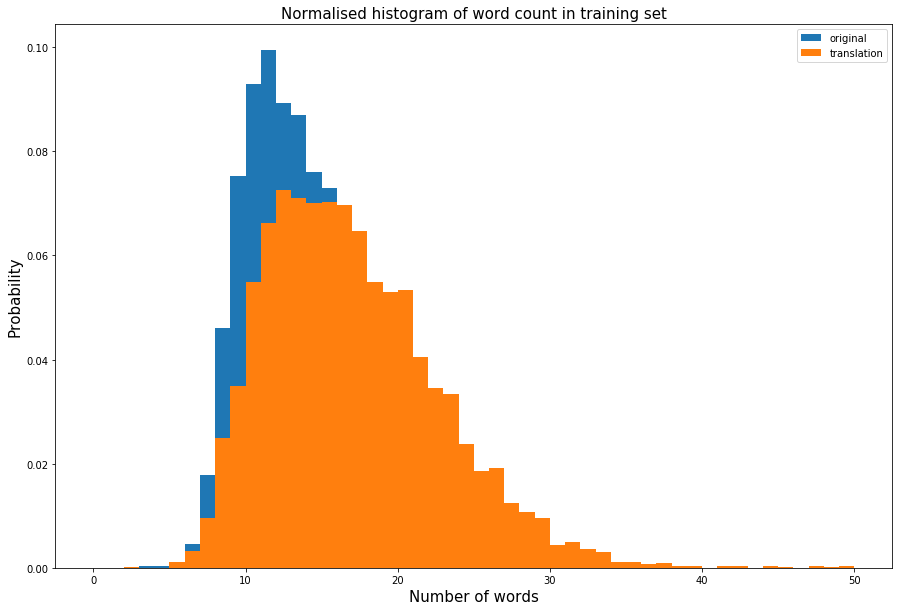

In [4]:
import matplotlib.pyplot as plt

plt.figure()
original_qs = pd.Series(train['original'].tolist()).astype(str)
translation_qs = pd.Series(train['translation'].tolist()).astype(str)

dist_original = original_qs.apply(lambda x: len(x.split(' ')))
dist_translation = translation_qs.apply(lambda x: len(x.split(' ')))

plt.figure(figsize=(15, 10))
plt.hist(dist_original, bins=50, range=[0, 50], normed=True, label='original')
plt.hist(dist_translation, bins=50, range=[0, 50], normed=True, label='translation')
plt.title('Normalised histogram of word count in training set', fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Probability', fontsize=15)

print('mean-original {:.2f} std-original {:.2f} mean-translation {:.2f} std-translation {:.2f} max-original {:.2f} max-translation {:.2f}'.format(dist_original.mean(),
                          dist_original.std(), dist_translation.mean(), dist_translation.std(), dist_original.max(), dist_translation.max()))

mean-original 14.18 std-original 4.27 mean-translation 17.05 std-translation 8.52 max-original 27.00 max-translation 161.00


<Figure size 432x288 with 0 Axes>

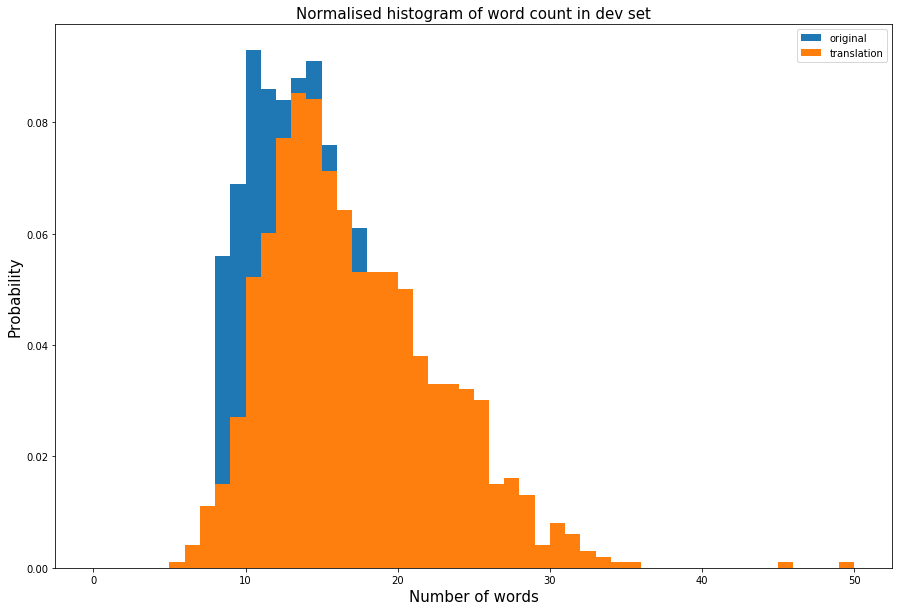

In [5]:
import matplotlib.pyplot as plt

plt.figure()
original_qs = pd.Series(dev['original'].tolist()).astype(str)
translation_qs = pd.Series(dev['translation'].tolist()).astype(str)

dist_original = original_qs.apply(lambda x: len(x.split(' ')))
dist_translation = translation_qs.apply(lambda x: len(x.split(' ')))

plt.figure(figsize=(15, 10))
plt.hist(dist_original, bins=50, range=[0, 50], normed=True, label='original')
plt.hist(dist_translation, bins=50, range=[0, 50], normed=True, label='translation')
plt.title('Normalised histogram of word count in dev set', fontsize=15)
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Probability', fontsize=15)

print('mean-original {:.2f} std-original {:.2f} mean-translation {:.2f} std-translation {:.2f} max-original {:.2f} max-translation {:.2f}'.format(dist_original.mean(),
                          dist_original.std(), dist_translation.mean(), dist_translation.std(), dist_original.max(), dist_translation.max()))



